# Text Data Analysis on a famous  Video sharing and social media platform

Importing required libraries-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
comments=pd.read_csv("GBcomments.csv",error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

Basic Information about our dataframe:

In [4]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718452 entries, 0 to 718451
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      718452 non-null  object
 1   comment_text  718424 non-null  object
 2   likes         718452 non-null  int64 
 3   replies       718452 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 21.9+ MB


Checking for NULL values and dropping them from our dataset-

In [5]:
comments.isnull().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [6]:
comments.dropna(inplace=True)
comments.shape

(718424, 4)

# Performing Sentimental Analysis on Comments

In [11]:
#!pip install textblob                            --This library used for sentiment analysis

In [9]:
from textblob import TextBlob

In [10]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [12]:
comments['polarity']=polarity

In [13]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

Performing EDA on Positive sentiment Comments-

In [14]:
comments_positive=comments[comments['polarity']==1]

In [15]:
comments_positive.shape

(20400, 5)

In [16]:
# pip install wordcloud
# This library is used to visualise the Importance of a word in a given large chunk of text based on its usage frequency

In [17]:
from wordcloud import WordCloud,STOPWORDS      
##STOPWORDS is used to exclude words like he,she,they etc which don't carry any importance in our analysis

In [18]:
stopwords=set(STOPWORDS)

In [19]:
total_comments=" ".join(comments_positive['comment_text'])

In [20]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

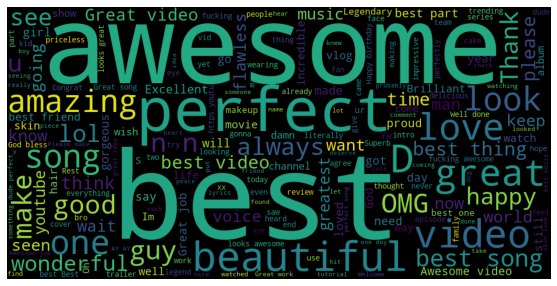

In [21]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")                           ## Higher the frequency of the word, the higher is its priority(Size).

Performing EDA ON Negative sentiment comments-

In [22]:
comments_negative=comments[comments['polarity']==-1]
comments_negative.shape

(3339, 5)

In [23]:
total_comments=" ".join(comments_negative['comment_text'])

In [24]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

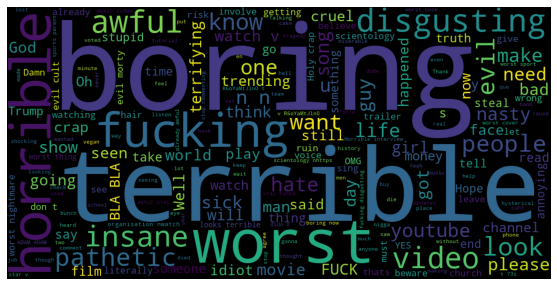

In [25]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off") 

## Analysing Trending Tags and Views on Youtube

In [26]:
videos=pd.read_csv('USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [27]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [28]:
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [29]:
tags=" ".join(videos['tags'])

In [30]:
tags

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

Removing Noise in Tags i.e anything other than the alphabetic characters using 'Regular Expressions':

In [31]:
import re

In [32]:
tags=re.sub('[^a-zA-Z]',' ',tags)

In [33]:
tags=re.sub(' +',' ',tags)

In [34]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [35]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

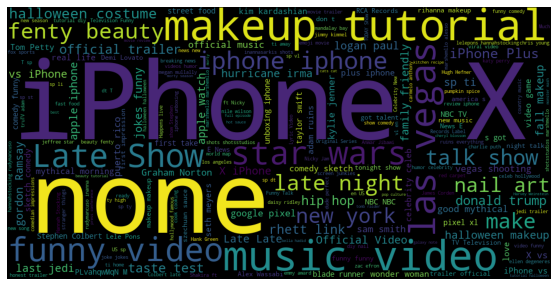

In [36]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")                                                         ##Following are the Trending Tags on Youtube

# Analysis on likes,dislikes,views and their correlation with each other : 

Using regression plot to visualise relationship between views and likes

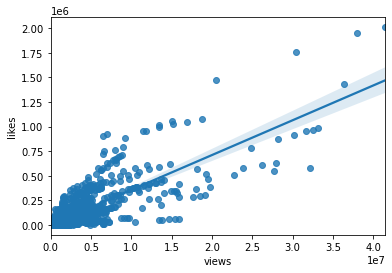

In [37]:
sns.regplot(data=videos,x='views',y='likes')
plt.show()

Using regression plot to visualise relationship between views and dislikes-

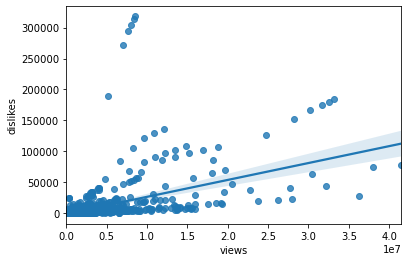

In [38]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.show()                                          ## dislikes are not as strongly related to views as likes

Finding out their correlation with each other-

In [39]:
df=videos[['views','likes','dislikes']]

In [40]:
df.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

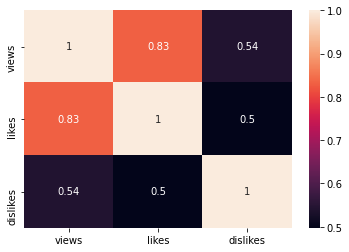

In [41]:
sns.heatmap(df.corr(),annot=True)

# Performing Analysis on emojis used in comments:

In [42]:
comments['comment_text'].head()

0    It's more accurate to call it the M+ (1000) be...
1                To be there with a samsung phone\n😂😂😂
2    Thank gosh, a place I can watch it without hav...
3    What happened to the home button on the iPhone...
4    Power is the disease.  Care is the cure.  Keep...
Name: comment_text, dtype: object

There is a UNICODE associated with each character-

In [43]:
print('\U0001F600')

😀


In [44]:
# pip install emoji   Note: Latest version of emoji won't work, use pip install emoji==0.6.0

In [45]:
import emoji

In [46]:
str=""
for i in comments['comment_text']:
    for j in i:
        if j in emoji.UNICODE_EMOJI:
            str=str+j
            

In [47]:
len(str)              # There are total 341868 emojis in comment_text column 

341868

In [48]:
str                   # Printing all the emojis

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏🇪🇸😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟🇺🇸😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖🇸🇸🇸🇸❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊

Keeping count of each unique emoji-

In [49]:
dict={}
for i in set(str):
    dict[i]=str.count(i)

In [50]:
dict.items()

dict_items([('💝', 562), ('😿', 127), ('🐺', 125), ('😴', 286), ('🐄', 35), ('✒', 20), ('🛒', 1), ('☣', 19), ('🛂', 5), ('♈', 11), ('🇦', 963), ('🏴', 14), ('🦂', 15), ('♒', 10), ('📝', 16), ('🚁', 5), ('🍚', 17), ('🎣', 27), ('🚆', 7), ('👝', 14), ('💡', 63), ('💔', 652), ('💗', 3071), ('😾', 30), ('🔦', 16), ('⚱', 23), ('⚛', 8), ('🏳', 92), ('🐀', 45), ('⏏', 4), ('🥛', 5), ('🐨', 39), ('🦌', 6), ('🏘', 8), ('🚬', 35), ('♣', 23), ('🎥', 106), ('👓', 66), ('⛳', 10), ('🚻', 5), ('🛳', 10), ('🔘', 7), ('🧀', 446), ('⏬', 6), ('🍭', 81), ('⚫', 49), ('🏔', 11), ('⤵', 6), ('📦', 17), ('🙅', 150), ('🚴', 8), ('🐔', 43), ('👬', 47), ('🎵', 324), ('🏖', 15), ('🔀', 6), ('⛅', 18), ('😤', 287), ('🅰', 14), ('👽', 95), ('🛬', 4), ('💭', 56), ('🕝', 8), ('💀', 892), ('➿', 5), ('🎎', 8), ('🔌', 34), ('🅿', 13), ('🔥', 10249), ('🥀', 26), ('🍫', 117), ('🕷', 99), ('⬆', 23), ('👴', 40), ('🔝', 178), ('🤶', 7), ('🛁', 6), ('🏷', 4), ('🍣', 54), ('🎾', 14), ('📱', 226), ('💱', 24), ('🎀', 191), ('🍡', 30), ('🚾', 6), ('🚛', 5), ('👧', 163), ('🛏', 7), ('🦔', 2), ('🃏', 10), ('

Sorting dict on the basis of Values-

In [51]:
final={}
for (key,value) in sorted(dict.items(),key= lambda item:item[1]) :
    final[key]=value


In [52]:
final.items()

dict_items([('🛒', 1), ('🧤', 1), ('🥡', 1), ('🥌', 1), ('🦓', 1), ('🧠', 1), ('🤹', 1), ('🥨', 1), ('🤽', 1), ('🥟', 1), ('🦏', 1), ('🥚', 1), ('🥜', 1), ('🤾', 1), ('🛷', 1), ('🧣', 1), ('🤟', 1), ('🤺', 1), ('🦔', 2), ('🧛', 2), ('🧡', 2), ('🧝', 2), ('🤱', 2), ('🎌', 2), ('🧒', 2), ('🦕', 2), ('🧢', 2), ('🧘', 2), ('🦖', 2), ('🥅', 2), ('🤫', 3), ('🥄', 3), ('🥖', 3), ('🤨', 3), ('🧐', 3), ('🤯', 3), ('⏏', 4), ('🛬', 4), ('🏷', 4), ('⚙', 4), ('⏯', 4), ('🛢', 4), ('🗄', 4), ('⏸', 4), ('♟', 4), ('♾', 4), ('🦍', 4), ('⏹', 4), ('🦐', 4), ('🗂', 4), ('🥞', 4), ('🧟', 4), ('☸', 4), ('⚗', 4), ('💹', 4), ('☦', 4), ('🥝', 4), ('🦆', 4), ('🖇', 4), ('🛣', 4), ('🗓', 4), ('⏲', 4), ('🤬', 4), ('🤵', 4), ('🖍', 4), ('🥈', 4), ('🏌', 4), ('🛂', 5), ('🚁', 5), ('🥛', 5), ('🚻', 5), ('➿', 5), ('🚛', 5), ('㊙', 5), ('🈁', 5), ('🧖', 5), ('✡', 5), ('Ⓜ', 5), ('⚾', 5), ('🦒', 5), ('🕎', 5), ('ℹ', 5), ('🚠', 5), ('🔡', 5), ('🕹', 5), ('🔁', 5), ('🈴', 5), ('🖨', 5), ('🔤', 5), ('🈯', 5), ('🈂', 5), ('🔚', 5), ('🔖', 5), ('🚎', 5), ('🔠', 5), ('◻', 5), ('⛸', 5), ('🆔', 5), ('♠', 5)

In [53]:
keys=[*final.keys()]
values=[*final.values()]

To get top 20 most used emojis in comments-

In [54]:
df=pd.DataFrame({'emojis':keys[-20:],'count':values[-20:]})

In [55]:
df

emojis  count
0       🙌   2734
1       🏼   2961
2       💙   2968
3       💗   3071
4       👌   3534
5       💜   3616
6       🏻   4412
7       💖   4809
8       😊   4946
9       👏   5357
10      😬   5489
11      👍   5817
12      😘   6334
13      💕   6531
14      ♥   7173
15      😭   9098
16      🔥  10249
17      😍  34856
18      ❤  36780
19      😂  43947

<AxesSubplot:xlabel='emojis', ylabel='count'>

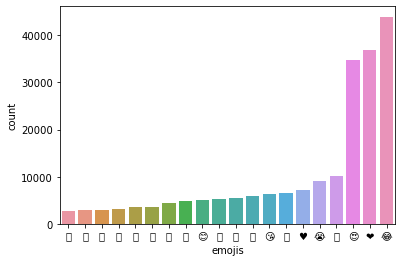

In [56]:
sns.barplot(df['emojis'],df['count'])

A better user interactive visualisation can be done using Plotly library as follows-

In [57]:
import plotly.graph_objs as go
from plotly.offline import iplot              

In [58]:
trace=go.Bar(x=df['emojis'],y=df['count'])
iplot([trace])